MSE: 6.2661155691164865
RMSE: 2.5032210388051004
R2: 0.6469070207402907


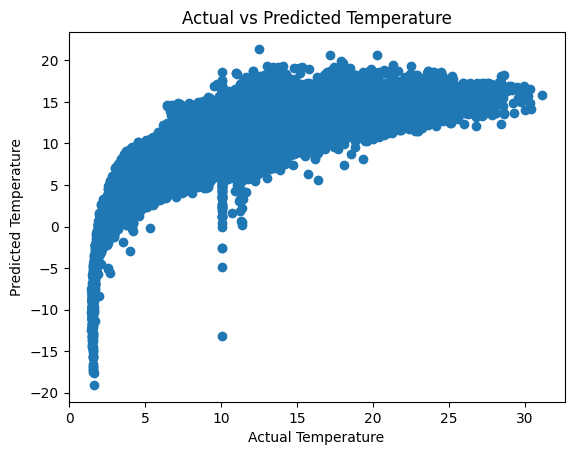

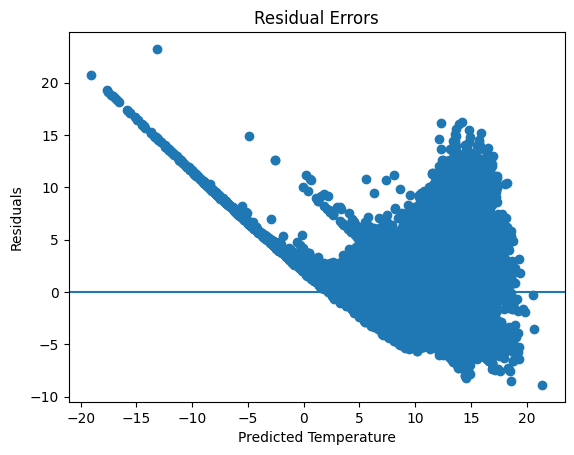

Ridge R2: 0.6469070213032113
Lasso R2: 0.6419380977359064


In [1]:
#SUPRIYA K 24BAD118
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("bottle.csv", low_memory=False)

features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

data = df[features + [target]].copy()
data = data.fillna(data.median())

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.axhline(y=0)
plt.title("Residual Errors")
plt.show()

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))

Accuracy: 0.6132971506105834
Precision: 1.0
Recall: 0.030612244897959183
F1 Score: 0.0594059405940594


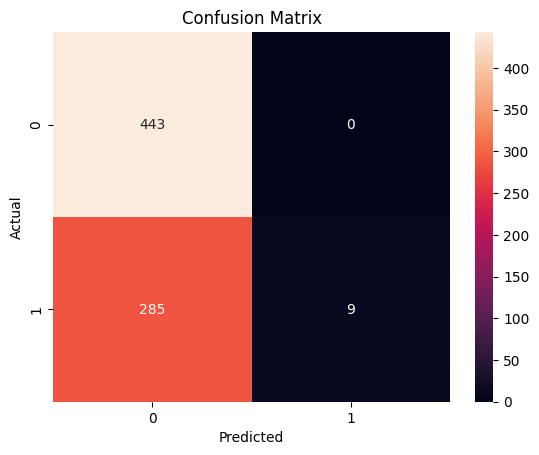

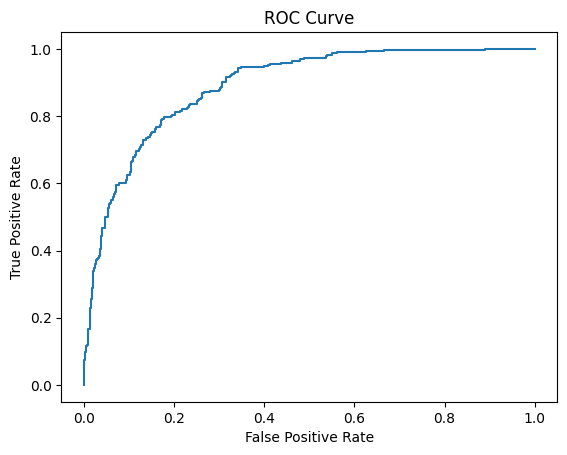

AUC Score: 0.8891755347737289


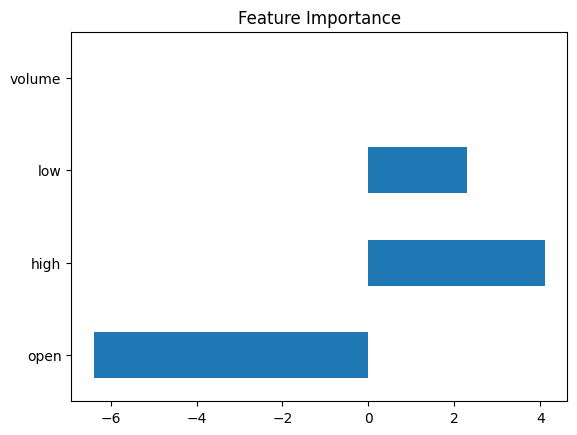

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Optimized Accuracy: 0.8113975576662144


In [3]:
#SUPRIYA K 24BAD118
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

df = pd.read_csv("LICI - 10 minute data.csv")

df.columns = df.columns.str.strip()

open_col = [c for c in df.columns if 'open' in c.lower()][0]
high_col = [c for c in df.columns if 'high' in c.lower()][0]
low_col = [c for c in df.columns if 'low' in c.lower()][0]
close_col = [c for c in df.columns if 'close' in c.lower()][0]
vol_col = [c for c in df.columns if 'vol' in c.lower()][0]

df['Price_Movement'] = np.where(df[close_col] > df[open_col], 1, 0)

features = [open_col, high_col, low_col, vol_col]
X = df[features].fillna(df[features].median())
y = df['Price_Movement']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))

importance = pd.Series(model.coef_[0], index=features)
importance.plot(kind='barh', title="Feature Importance")
plt.show()

params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Optimized Accuracy:", accuracy_score(y_test, best_pred))
